In [1]:
10+10 + 5 + 15 + 15 + 20 
3、4、8、

75

**5.1** 设样本空间$X$= $R^n$。标签采用0-1标签
形式。设$h_w$是一个Logistic 回归模型。请分别描述被$h_w$的最大概率分类函数归入类0与类1的区域。

$h_w\ge0.5$，归入类1  
$h_w< 0.5$，归入类0

**5.2** 二元分类问题的标签形式是灵活多样的。式(5. 10)中的交叉熵采用了0-1标签形式。{-1,+1}是另一种常用的标签形式。请描述基于{-1,+1}标签形式的交叉熵表达式。

$$
\frac{1}{m}\sum_{i=1}^{m}[\frac{y^{(i)}+1}{2}log(1+e^{-<w,x^{(i)}>})+\frac{-y^{(i)}+1}{2}log(1+e^{<w,x^{(i)}>})]
$$

**5.3** Logistic回归算法是一个经验损失最小化算法。因此，可以对其进行正则化，请描述Logistic回归算法的$L_1$正则化与$L_2$正则化算法的目标函数，并用梯度下降算性实现Logistic回归算法的$L_1$正则化与L2正则化。

$L_1$正则化Logistic回归:   
$$
\min_{w \in \mathbb R^n}\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(1+e^{-<w,x^{(i)}>})+(1-y^{(i)})log(1+e^{<w,x^{(i)}>})]+\lambda|w| \\
\nabla F(w)=\frac{1}{m}X^T(h_w(X-y))+\lambda sign(w)
$$
$L_2$正则化Logistic回归:   
$$
\min_{w \in \mathbb R^n}\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(1+e^{-<w,x^{(i)}>})+(1-y^{(i)})log(1+e^{<w,x^{(i)}>})]+\lambda\|w\|^2 \\
\nabla F(w)=\frac{1}{m}X^T(h_w(X-y))+2\lambda w
$$
梯度下降算法：  
$ w = 0 $  
for $t = 1,2,…,N$:  
&emsp;&emsp; $w\leftarrow w - \eta \nabla F(w)$  
return $w$    

**5.4** 在第3章中介绍的逐步回归算法是线性回归的特征选择算法。它的基本思想是，逐步引入能够显著降低均方误差的特征。同一思想也可以用于Logistic回归算法。请实现关于Logisic回归问题的逐步Logistite回归算法。

StepwiseLogisticRegression($X,y$):  
$A={1}, C=\{2,3,…,n\}$  
for $i = 2,3,...,n$:  
&emsp; &emsp; $CrossEntropy_A=\min_{w \in \mathbb R ^{|A|}}\frac{1}{m}\|Y\log(1+e^{X_Aw})\|^2$  
&emsp; &emsp; for $j \in C$:  
&emsp; &emsp; &emsp; &emsp;$CrossEntropy_{A \cup j}=\min_{w \in \mathbb R ^{|A|+1}}\frac{1}{m}\|Y\log(1+e^{X_{A\cup j}w})\|^2$  
&emsp; &emsp; $j^*=argmin_{j\in C}CrossEntropy_{A \cup j}$  
&emsp; &emsp; if $CrossEntropy_A/CrossEntropy_{A \cup j^*}$ pass F test:  
&emsp; &emsp; &emsp; &emsp; $A \leftarrow A \cup j^*$  
&emsp; &emsp; &emsp; &emsp; $C \leftarrow C \setminus j^*$ 
&emsp; &emsp;  
&emsp; &emsp; break  
return A

**5.5** 设有8条标签属于{0,1}的数据。它们的标签组成的向量为(1,1,1,1,0,0,0,0),设模型h对这8条数据的标签预测为(1,0,1,1,0,1,1,0)。请计算模型h的准确率、精确率与召回率。

$$Accuracy=\frac{5}{8}=0.625$$ 
$$TP=3$$
$$FP=2$$
$$FN=1$$
$$Precision=\frac{TP}{TP+FP}=0.6$$  
$$Recall=\frac{TP}{TP+FN}=0.75$$

**5.6** 乳腺癌预测问题。  
&emsp;&emsp;乳腺癌预测问题的任务是:根据患者的病理特征，预测患者的乳腺肿瘤是良性还是恶性。数据集来自Sklearn工具库中的乳腺癌数据集。该数据集包含569例乳腺肿瘤病例，每一条病例含有患者的30个病例特征以及该患者的肿瘤是良性还是恶性的结果。  
&emsp;&emsp;图5.25中的程序导入乳腺癌数据集，并生成特征矩阵与标签矩阵。请基于图5.25.用Logistic回归算法完成乳腺癌预测问题。完成预测后，还需要计算模型的准确率、精确率与召回率。最后，绘制出ROC曲线，并计算AUC测度。 

![图5.25](./5.25.png)

**导入乳腺癌数据集并生成特征矩阵与标签矩阵的程序**


In [9]:
!pip install matplotlib

^C


In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
#import matplotlib.pyplot as plt

In [11]:
def process_features(X):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]
    return X

In [12]:
X, y = load_breast_cancer(return_X_y=True)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = process_features(X_train)
X_test = process_features(X_test)

In [15]:
class LogisticRegression:
    def fit(self, X, y, lr=0.1, epoch=10000):
        m, n = X.shape
        w = np.zeros((n, 1))
        for i in range(epoch):
            grad = 1 / m * X.T.dot(self.sigmoid(X.dot(w))-y)
            w -= lr * grad
        self.w = w
    def sigmoid(self, x):
    # X = []
    # for i in range(x.shape[0]):
    #   if x[i] >= 0:
    #     X.append(1 / (1 + np.exp(-x[i])))
    #   else:
    #     X.append(np.exp(x[i]) / (1 + np.exp(x[i])))
    # return np.array(X).reshape(-1, 1)
        return 1/(1+np.exp(-x))

    def threshold(self, t, probability): # 阈值分类
        return (probability >= t).astype(np.int)

    def predict_probability(self, X):
        return self.sigmoid(X.dot(self.w))

    def predict(self, X):
        return self.threshold(0.5, self.predict_probability(X))

    def accuracy(self, y_true, y_pred): # 准确率
        return np.average((y_true==y_pred).astype(np.int))

    def precision(self, y_true, y_pred): # 精确率
        TP = (y_true * y_pred).sum()
        FP = ((1 - y_true) * y_pred).sum()
        if TP + FP == 0:
            return 1.0
        else:
            return TP / ( TP + FP)

    def recall(self, y_true, y_pred): # 召回率
        TP = (y_true * y_pred).sum()
        FN = (y_true * (1 - y_pred)).sum()
        if TP + FN == 0:
            return 1.0
        else:
            return TP / (TP + FN)
    def plot_roc_curve(self, X, y): # 绘制ROC曲线并计算AUC度量
        TPRs, FPRs = [], []
        probability = self.predict_probability(X)
        for i in range(100):
            y_pred = self.threshold(0.01 * i, probability)
            TP = (y * y_pred).sum()
            FP = ((1 - y) * y_pred).sum()
            TN = ((1 - y) * (1 - y_pred)).sum()
            FN = (y * (1 - y_pred)).sum()
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            TPRs.append(TPR)
            FPRs.append(FPR)
        plt.plot(FPRs, TPRs)
        plt.xlabel('假正率')
        plt.ylabel('真正率')
        plt.show()


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("准确率为{}，精确率为{}，召回率为{}".format(model.accuracy(y_test, y_pred), model.precision(y_test, y_pred), model.recall(y_test, y_pred)))
#model.plot_roc_curve(X_test, y_test)

D:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


准确率为0.8508771929824561，精确率为0.9629629629629629，召回率为0.7761194029850746


  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages

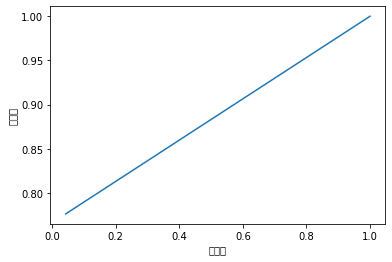

In [28]:
model.plot_roc_curve(X_test, y_test)

accuracy = 0.9473684210526315, precision = 0.9692307692307692, recall = 0.9402985074626866


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


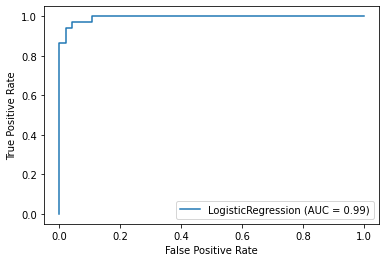

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, plot_roc_curve
  
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy = {}, precision = {}, recall = {}".format(accuracy, precision, recall))
plot_roc_curve(model, X_test, y_test)

**5.7** 红酒产地预测问题。  
&emsp;&emsp;红酒产地预测问题的任务是:根据红酒的各项指标，鉴定红酒的产地。数据来自Sklearn工具库中的红酒数据集。该数据集中包含来自3个不同产地的178瓶红酒。每一条数据表示一瓶红酒,其中记录了 13种指标作为特征.例如酒的颜色、蒸馏度、酸碱度，花青素浓度等，同时还记录了红酒的产地作为标签。  
&emsp;&emsp;图5.26中的程序导入红酒数据集，并生成特征矩阵与标签矩阵。请基于图5.26,用Softmax回归算法完成红酒产地预测问题。

![图5.26](./5.26.png)

**导入红酒数据集 并生成特征矩阵与标签矩阵的程序**


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
def process_features(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(1.0 * X)
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]
    return X

In [3]:
def softmax(scores):
    e = np.exp(scores)
    s = np.sum(e, axis=1)
    for i in range(len(s)):
        e[i] /= s[i]
    return e

In [4]:
class SoftmaxRegression:
    def fit(self, X, y, lr=0.1, epoch=5000):
        m, n = X.shape
        m, k = y.shape
        w = np.zeros((n, k))
        for t in range(epoch):
            proba = softmax(X.dot(w))
            grad = X.T.dot(proba - y) / m
            w = w - lr * grad
            self.w = w
    def predict(self, X):
        return np.argmax(softmax(X.dot(self.w)), axis=1)

In [5]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = process_features(X_train)
X_test = process_features(X_test)
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

In [6]:
model = SoftmaxRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9722222222222222


**5.8** Logistic回归模型的校准性。   
&emsp;&emsp;在一个采用0-1标签形式的二元分类问题中,给定模型$h$。对任意样本$x$，$h(x)$表示$x$的标签为1的概率。取定一组训练数据$S= \{(x^{(1)}, y^{(1)}),(x^{(2)}, y^{(2)}), \dots,(x^{(m)}, y^{(m)})\}$。其中，$x^{(i)}\in\mathbb{R^n},y^{(i)}\in\mathbb\{0,1\}$。如果模型$h$满足如下性质:  
$$
\frac{1}{m}\sum_{i=1}^{m}h(x^{(i)}) = \frac{1}{m}\sum_{i=1}^{m}y^{(i)} \qquad\qquad\qquad\qquad (5.70)
$$  

则称$h$是一个校准的模型。这是因为，如果式(5.70)成立，则模型对标签为1的概率预测恰等于标签为1的频率。  
&emsp;&emsp;校准特性是使得许多实际应用都采用Logistic回归算法的一个重要因素。试证明，Logistic回归模型满足式(5.70)中的校准特性。  


证明：  
Logistic回归中，标签服从伯努利分布  
$$
f(y)=
\left\{  
             \begin{array}{**lr**}  
             p,\qquad如果y=1  \\  
             1-p,\ 如果y=0
             \end{array}  
\right.
$$
由于监督式学习中的模型预测的是标签分布的期望，对logistic回归而言，标签分布的期望是p，即模型预测$h_w(x)$。  
样本$S$中标签分布的期望为$\frac{1}{m}\sum_{i=1}^{m}y^{(i)}$，所以式(5.70)成立。


**5.9** 泊松回归问题。  
&emsp;&emsp;(1)泊松分布用于描述单位时间内某随机事件发生次数的概率分布。取定样本空间$S=\{0,1,2,...\}$为全体非负整数。一个以$λ>0$为参数的泊松分布$Poisson(λ)$具有如下形式的密度函数:    
$$
f(y) = \frac{e^{-\lambda}\lambda^{y}} {y!}，  y\in\mathbb{S}
$$
试证明泊松分布$Poisson(λ)$是指数分布族中的一员，并请给出对数正规化子$a(\eta)$、底层观测$b(y)$以及充分统计量$T(y)$的具体形式。   
&emsp;&emsp;(2)在一个回归问题中,如果标签值取整数值，并且表示某类事件发生的次数，就称该回归问题是一个计数回归问题。一个典型的例子是预测客服中心可能接到的电话次数。在计数回归问题中,往往设标签分布是泊松分布。基于这个假设的回归算法被称为泊松回归算法。请按照指数分布族原则推导出泊松回归的模型形式。   
&emsp;&emsp;(3)请按照最大似然原则推导出泊松回归问题的目标函数。


证明：  
(1)在式中取如下参数
$$
a(\eta)=\lambda=e^{\eta}\\
b(y)=\frac{1}{y!}\\
T(y)=y\\
\eta=\log \lambda
$$
则可以验证
$$
f(y)=b(y)e^{\eta T(y)-a(\eta)}
$$
证明泊松分布是指数分布族中的一员。  
(2)泊松分布的期望是$\lambda$，由(1)可得$\lambda=e^\eta$，根据指数分布族原则，泊松分布回归的模型为
$$
h_w(x)=e^{<w,x>}
$$
(3)
$$
\begin{equation*}%加*表示不对公式编号
\begin{split}
p_w(Y=y)&=\frac{e^{-\lambda}\lambda^{y}} {y!}，  y\in\mathbb{S}\\
&=\frac{e^{-h_w(x)}h_w(x)^{y}} {y!}，  y\in\mathbb{S}\\
\end{split}
\end{equation*}
$$
$$
\begin{equation*}%加*表示不对公式编号
\begin{split}
Like(w|y^{(1)},|y^{(2)},...,|y^{(m)})&=\prod_{i=1}^mp_w(Y=y^{(i)})\\
&=\prod_{i=1}^m\frac{e^{-h_w(x)}h_w(x)^{y^{(i)}}} {y^{(i)}!}\\
\end{split}
\end{equation*}
$$
对上式取对数并乘以常数$-\frac{1}{m}$得到泊松分布的目标函数
$$
-\frac{1}{m}\sum_{i=1}^m[-h_w(x)+y^{(i)}\log{h_w(x)}-\log{y^{(i)}!}]
$$
